# Draw response matrix $K^{ij}$ and differentially for $l=$ genPt and $j=$recoPt : $K^{ij}_l$

#### Load packages

In [1]:
import train as tn
#reload(tn)

import plotting
#reload(plotting)

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import numpy as np

from pprint import pprint

import pandas as pd

import os
import json
import importlib

import util as ut
reload(ut)

Welcome to ROOTaaS 6.06/08


<module 'util' from 'util.pyc'>

In [2]:
ut.defaultParameters(dataDir="/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data", 
                     classifiers=['class','recoPt'],#,'recoNjets2p5'],
                          load = True,
                     inputName = "2clfs",
#                       outName = "3clfs_GenIsoAdded_out",
                        outDir = './classifiers',
                    inputDir = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers',
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 },
                     dataFiles=[(0,'output_GluGluHToGG_M125_IA.root'),                   
                                (1,'output_ttHToGG_M125_IA.root'),                     
                                (2,'output_VBFHToGG_M125_IA.root'),                            
                                (3,'output_VHToGG_M125_IA.root'),
                               ]
                    )


In [3]:
ut.setParams()
# manual fix in order that the json file doesn't overwrite inputDir
#ut.params['inputDir'] = "/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/classifiers"

# manual fix as rapidities are not yet included in n-tuples
ut.params['genBranches'] = ['genPt','genRapidity','genJet2p5Pt0','genJet2p5Pt1','genJet2p5Pt2',
'genJet2p5Pt3','genJet2p5Pt4','genJet2p5Pt5','weight','genNjets2p5','genLeadGenIso','genSubleadGenIso'] 

ut.params['recoBranches'] = ['recoPt','recoRapidity']

entered config files named my_train_config
hi
None


#### Load the Classifier trained with SM

In [4]:
%time FitterSM = ut.loadOrMake()

Load object with the name 2clfs and the following paramters 
loading
2clfs
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers/2clfs.pkl.gz
loading pickle /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers/2clfs.pkl.gz
loading data /mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers/2clfs.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity', u'recoPtBin', u'recoPtCat', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3', u'recoPtCat_prob_0',
       u'recoPtCat_prob_1', u're

#### Load all the BSM files from scratch

In [5]:
ut.defaultParameters(dataDir="/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data", 
                     classifiers=['class','recoPt'],#,'recoNjets2p5'],
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 }
                    )

ut.params['load'] = False

ut.params['genBranches'] = ['genPt','genRapidity','genJet2p5Pt0','genJet2p5Pt1','genJet2p5Pt2',
'genJet2p5Pt3','genJet2p5Pt4','genJet2p5Pt5','weight','genNjets2p5','genLeadGenIso','genSubleadGenIso'] 

ut.params['recoBranches'] = ['recoPt','recoRapidity']

ut.params['dataFiles'] = [(4,'output_SMS-T2bH_mSbottom-350_mLSP-150.root')]
ut.params['pfx'] = "genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV"

effFitter_BSM_1 = ut.loadOrMake()


ut.params['dataFiles'] = [(5,'output_SMS-T2bH_mSbottom-450_mLSP-200.root')]
ut.params['pfx'] = "genDiphotonDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV"

effFitter_BSM_2 = ut.loadOrMake()

ut.params['dataFiles'] = [(6,'output_SMS-T2bH_mSbottom-500_mLSP-1.root')]
ut.params['pfx'] = "genDiphotonDumper/trees/InsideAcceptance_mSb500_mLSP1_13TeV"

effFitter_BSM_3 = ut.loadOrMake()

    

Create object with the name effFitter and the following paramters 
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data
output_SMS-T2bH_mSbottom-350_mLSP-150.root
genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV
[('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data/output_SMS-T2bH_mSbottom-350_mLSP-150.root', 4, 'genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV', True, None)]
The number of selected events are 23140
shuffling dataset
defining bins
<type 'str'>
Create object with the name effFitter and the following paramters 
/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data
output_SMS-T2bH_mSbottom-450_mLSP-200.root
genDiphotonDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV
[('/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data/output_SMS-T2bH_mSbottom-450_mLSP-200.root', 5, 'genDiphotonDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV', True, None)]
The number of selected ev

In [6]:
df_BSM1 = effFitter_BSM_1.df
df_BSM2 = effFitter_BSM_2.df
df_BSM3 = effFitter_BSM_3.df

df_BSM = pd.concat([df_BSM1,df_BSM2,df_BSM3],ignore_index=True)

df_BSM['proc']

0        4
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
        ..
67956    6
67957    6
67958    6
67959    6
67960    6
67961    6
67962    6
67963    6
67964    6
67965    6
67966    6
67967    6
67968    6
67969    6
67970    6
67971    6
67972    6
67973    6
67974    6
67975    6
67976    6
67977    6
67978    6
67979    6
67980    6
67981    6
67982    6
67983    6
67984    6
67985    6
Name: proc, dtype: int8

In [7]:
"""
Change type from categorical to float
"""
df_BSM['recoPtBin'] = df_BSM['recoPtBin'].astype=('float')
#df = pd.DataFrame(a, dtype='float')

In [8]:
FitterSM.df = FitterSM.df.append(df_BSM,ignore_index=False)

In [9]:
prob_names = []
for col in FitterSM.df.columns :
    if '_prob_' in col :
        prob_names.append(col)

In [10]:
print prob_names

['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3', 'recoPtCat_prob_0', 'recoPtCat_prob_1', 'recoPtCat_prob_10', 'recoPtCat_prob_11', 'recoPtCat_prob_12', 'recoPtCat_prob_13', 'recoPtCat_prob_14', 'recoPtCat_prob_15', 'recoPtCat_prob_16', 'recoPtCat_prob_17', 'recoPtCat_prob_18', 'recoPtCat_prob_19', 'recoPtCat_prob_2', 'recoPtCat_prob_20', 'recoPtCat_prob_21', 'recoPtCat_prob_22', 'recoPtCat_prob_23', 'recoPtCat_prob_24', 'recoPtCat_prob_3', 'recoPtCat_prob_4', 'recoPtCat_prob_5', 'recoPtCat_prob_6', 'recoPtCat_prob_7', 'recoPtCat_prob_8', 'recoPtCat_prob_9']


#### delete probabilities in order that they are re-evaluated also on the BSM

In [11]:
for name in prob_names :
    del FitterSM.df[name]

In [12]:
#reload(ut)
ut.runEvaluation(FitterSM)

['class', 'recoPt']
class
class
class_prob_0
Index([u'absGenRapidity', u'absweight', u'class', u'genJet2p5Pt0',
       u'genJet2p5Pt1', u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4',
       u'genJet2p5Pt5', u'genLeadGenIso', u'genNjets2p5', u'genPt',
       u'genRapidity', u'genSubleadGenIso', u'proc', u'recoPt', u'recoPtBin',
       u'recoPtCat', u'recoRapidity', u'weight'],
      dtype='object')
running prediction for class
recoPt
recoPtCat
recoPtCat_prob_0
Index([u'absGenRapidity', u'absweight', u'class', u'genJet2p5Pt0',
       u'genJet2p5Pt1', u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4',
       u'genJet2p5Pt5', u'genLeadGenIso', u'genNjets2p5', u'genPt',
       u'genRapidity', u'genSubleadGenIso', u'proc', u'recoPt', u'recoPtBin',
       u'recoPtCat', u'recoRapidity', u'weight', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3'],
      dtype='object')
running prediction for recoPt
Index([u'absGenRapidity', u'absweight', u'class', u'genJet2p5Pt0',


In [13]:
#df = FitterSM.df

# Draw Histograms

In [14]:
def GetProdProcName (n) :
    if (n==0) :
        return 'ggF'
    if (n==1) :
        return 'ttH'
    if (n==2) :
        return 'VBF'
    if (n==3) :
        return 'VH'
    if (n==4) :
        return 'BSM1'
    if (n==5) :
        return 'BSM2'
    if (n==6) :
        return 'BSM3'

In [15]:
bins_dict = { 'genPt'        : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,1000]), 
             }
ut.runDefineBins(FitterSM,bins_dict)

<type 'str'>


In [16]:
df = FitterSM.df

In [17]:
first_train_evt = int(round(FitterSM.df.index.size*(1.-FitterSM.split_frac)))
BSM_mask = df['proc'].isin([4,5,6])
#take the test sample \
print first_train_evt
df = FitterSM.df[:first_train_evt].append(FitterSM.df[BSM_mask],
                                          ignore_index=True)

365625


In [18]:
class_list = ['recoPt']#,'recoNjets2p5']
#class_list = ['class']#,'recoNjets2p5']

save_directory = './plots/EffPlotgenPtScan/BSM1_2_3'
print(save_directory)
save_directory =None

./plots/EffPlotgenPtScan/BSM1_2_3


In [19]:
process_OfInterest = [4]#,5,6]

In [20]:
[GetProdProcName(n=s) for s in process_OfInterest]

['BSM1']

('Pt bin ', 0)
There are 25 features of type recoPtCat
[  4.32487583e+00   2.34703970e+00   9.91796404e-02   1.20183052e-02
   7.22242147e-03   4.48418176e-03   3.71800805e-03   3.24906432e-03
   3.03200213e-03   3.86461449e+00   1.78517461e-01   1.14475330e-02
   6.77187182e-03   4.10861941e-03   3.50847654e-03   3.16750188e-03
   3.05158645e-03   5.10321426e+00   4.32132006e-01   1.25501677e-02
   6.92759827e-03   4.18973248e-03   3.52743221e-03   3.18240421e-03
   3.03303497e-03]
recoPt_BSM1PtBin0
0
('Pt bin ', 1)
There are 25 features of type recoPtCat
[  1.15775414e+01   1.19922400e-01   6.69678402e+00   1.93047017e-01
   2.21705697e-02   1.37153370e-02   1.13327708e-02   9.89604928e-03
   9.18929651e-03   2.40789518e-01   1.04579115e+01   4.23489511e-01
   2.01680101e-02   1.26014613e-02   1.07660489e-02   9.72266588e-03
   9.29638743e-03   5.07414818e-01   1.45298920e+01   7.78737247e-01
   2.13012602e-02   1.27165653e-02   1.08268969e-02   9.76785738e-03
   9.28561483e-03]
reco

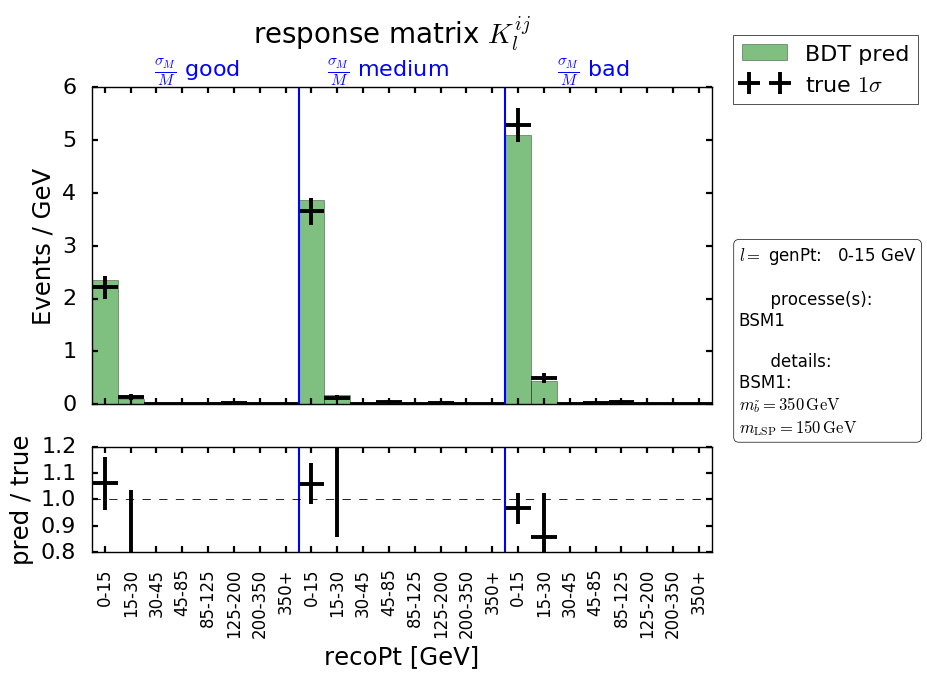

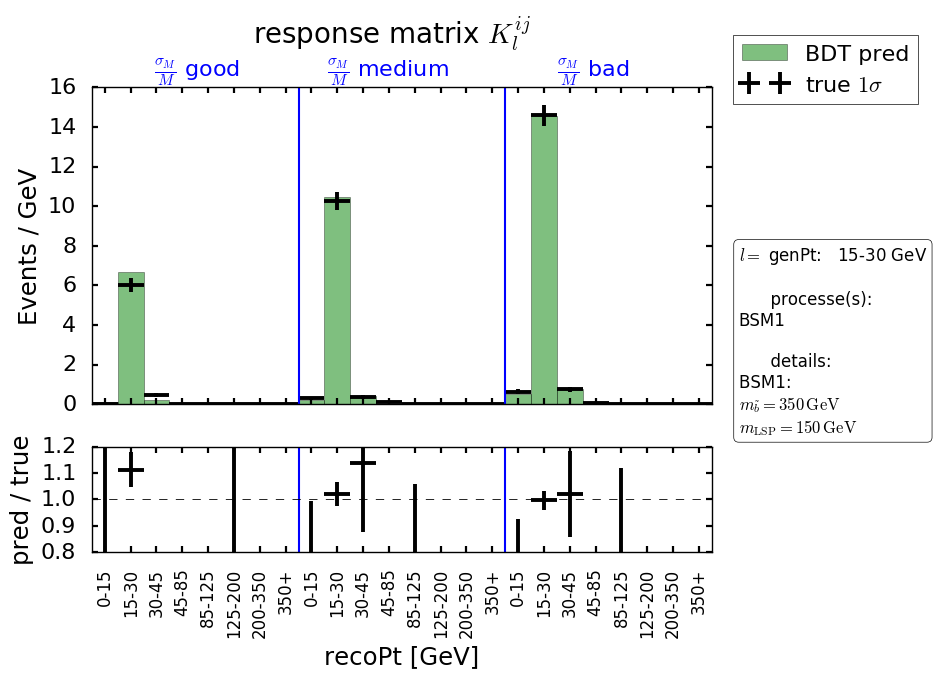

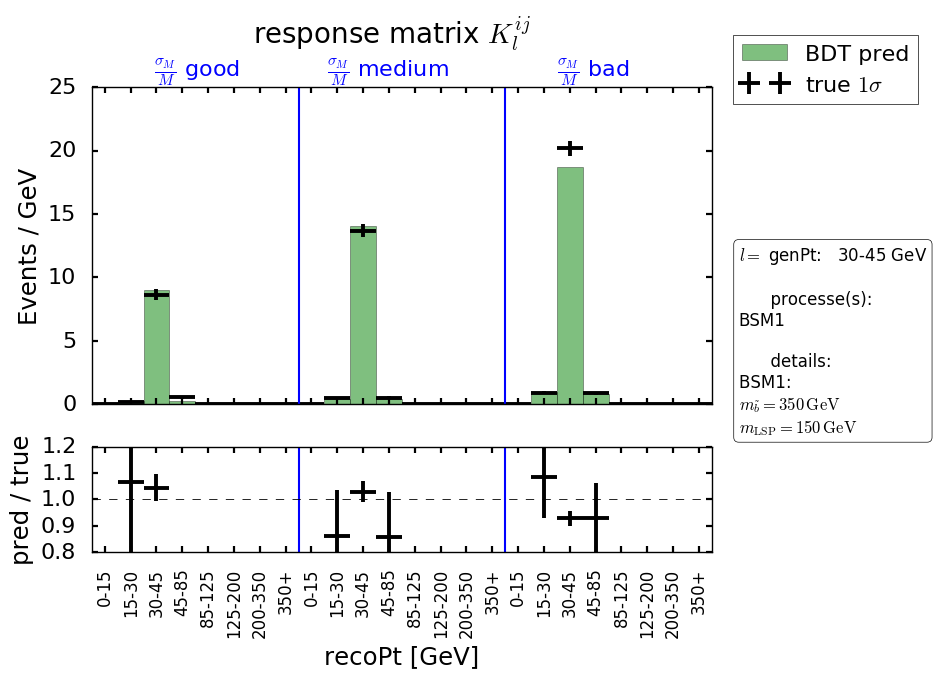

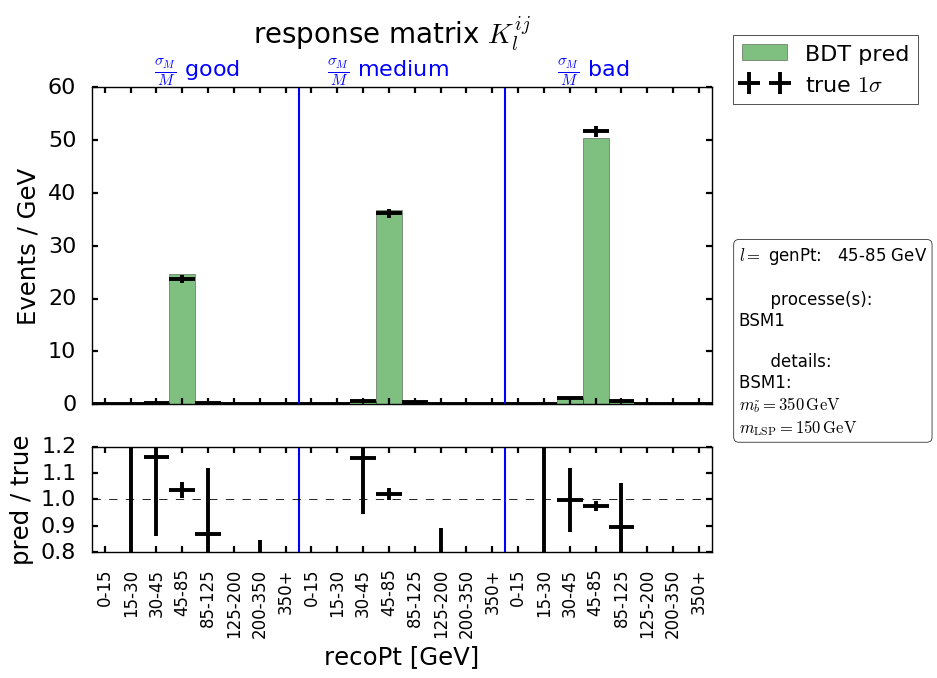

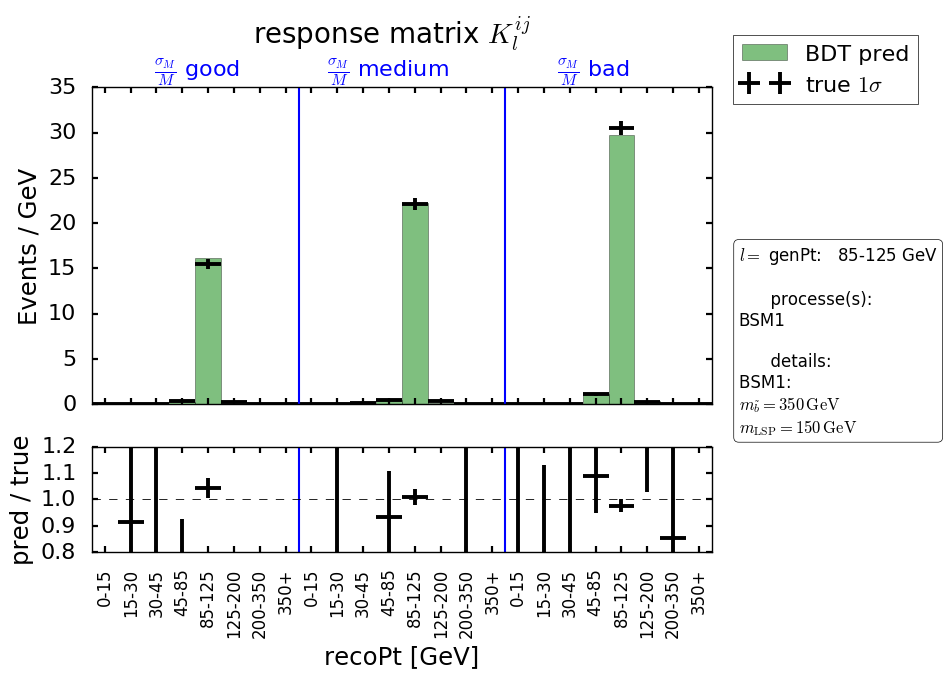

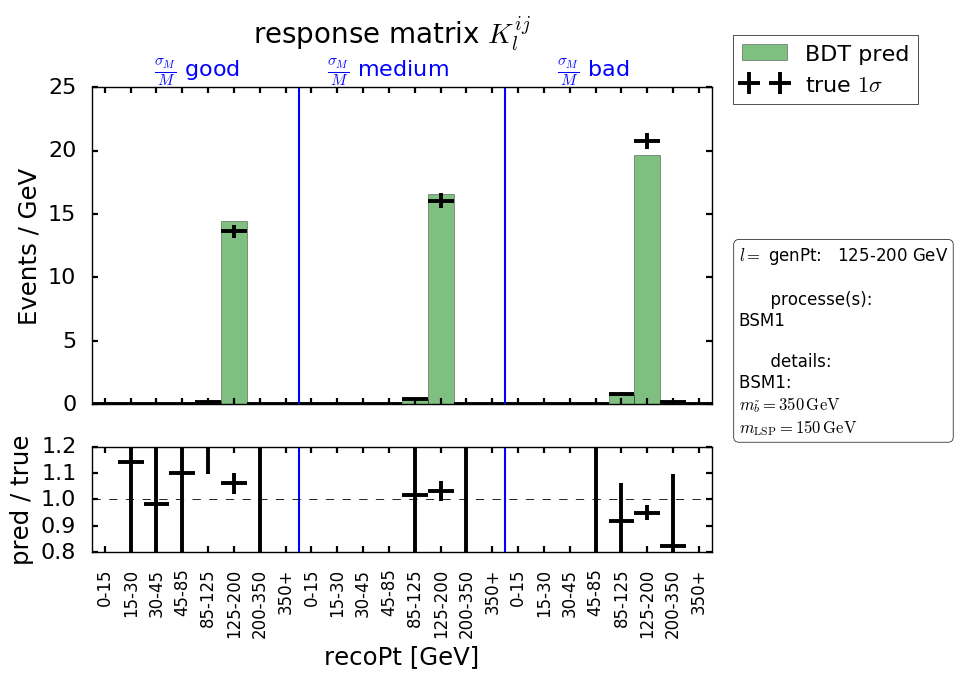

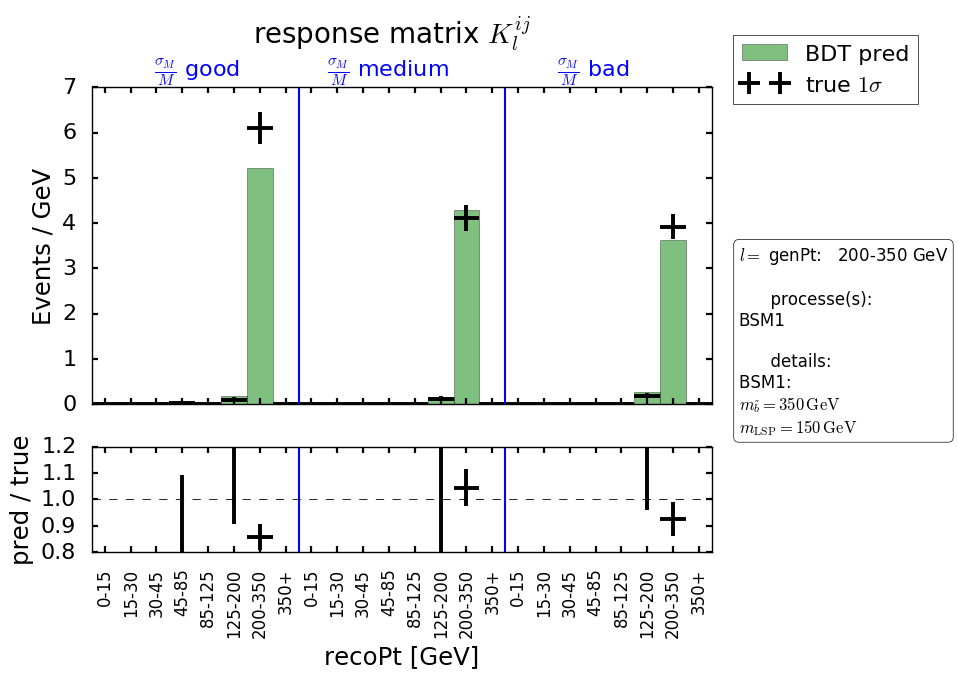

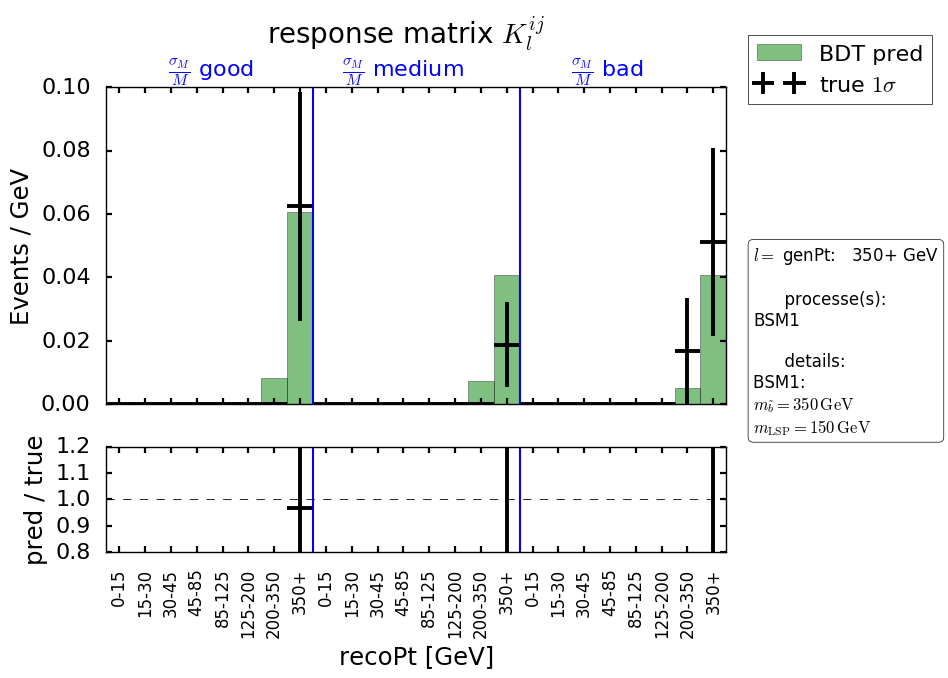

In [28]:
reload(plotting)
proc_mask = df['proc'].isin(process_OfInterest)
K_matrix=[]
for cl in class_list :
    for Pt_bin in xrange(df['genPtBin'].min(),df['genPtBin'].max(),1) :
    #for Pt_bin in [0,1,2] :    
        #for Rap_bin in xrange(df['absGenRapidityBin'].min(),df['absGenRapidityBin'].max(),1) :
        
            #print Pt_bin
            #print Rap_bin
        print ('Pt bin ',Pt_bin)
        Pt_mask = df['genPtBin']==Pt_bin
        p = plotting.draw_data_mc(
                df=df[proc_mask&Pt_mask],#&(df['absGenRapidityBin']==Rap_bin)],
                               column = cl, 
                              logy=False, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(process_OfInterest[0])+'PtBin'+str(Pt_bin),
                              absolute=False,
                            model_processes = [GetProdProcName(n=s) for s in process_OfInterest]
                             )
        K_matrix.append(p)

In [43]:
print np.shape(K_matrix)
K_matrix = np.reshape(K_matrix,np.shape(K_matrix)).T

(8, 25)


In [46]:
print type(K_matrix)
#normalize 
norm = sum(sum(K_matrix))
K_matrix = 1.*K_matrix / norm

<type 'numpy.ndarray'>


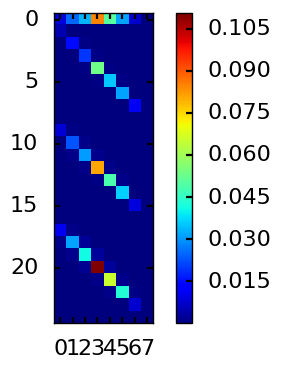

In [49]:
plt.imshow(K_matrix,interpolation='nearest')
plt.colorbar()

In [50]:
np.save('response_GenRecoPt',K_matrix)


variable "np" not defined.

variable "np.sa" not defined.

tab completion not implemented for this context


In [22]:
df.columns

Index([u'absGenRapidity', u'absweight', u'class', u'genJet2p5Pt0',
       u'genJet2p5Pt1', u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4',
       u'genJet2p5Pt5', u'genLeadGenIso', u'genNjets2p5', u'genPt',
       u'genRapidity', u'genSubleadGenIso', u'proc', u'recoPt', u'recoPtBin',
       u'recoPtCat', u'recoRapidity', u'weight', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3', u'recoPtCat_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_pr

# Inspect Islation of the photons

In [57]:
genPtBIN = 0


genIso_BSM1 = df[(df['proc']==4)&(df['genPtBin']==genPtBIN)]
genSubIso_BSM1 = df[(df['proc']==4)&(df['genPtBin']==genPtBIN)]


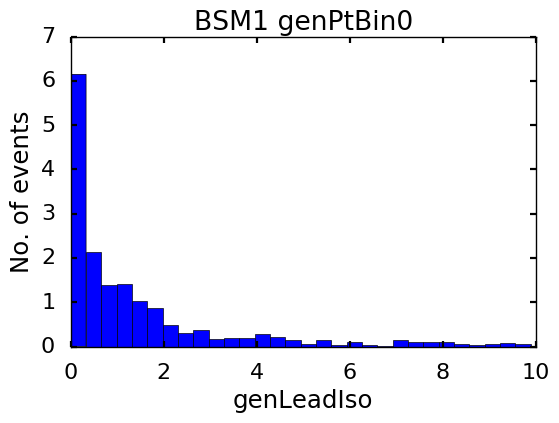

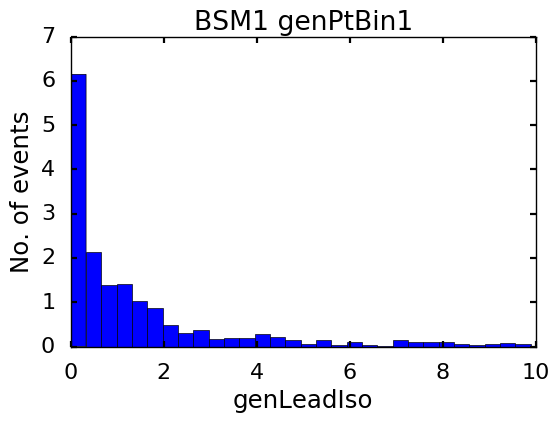

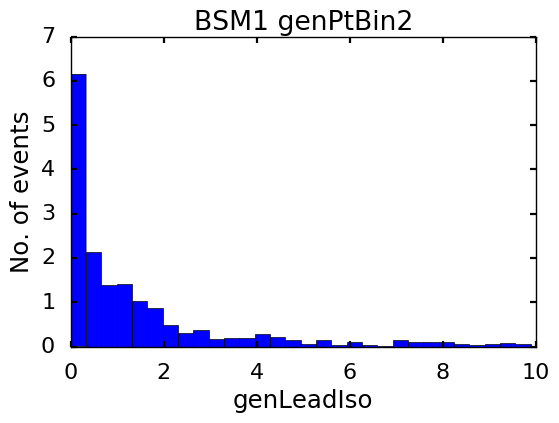

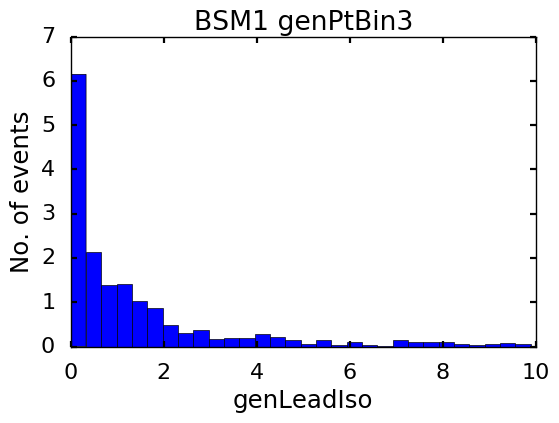

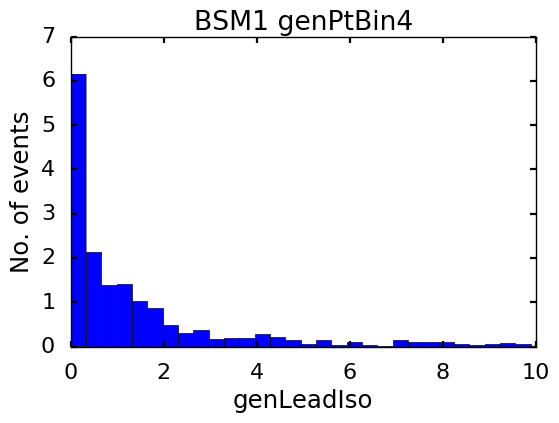

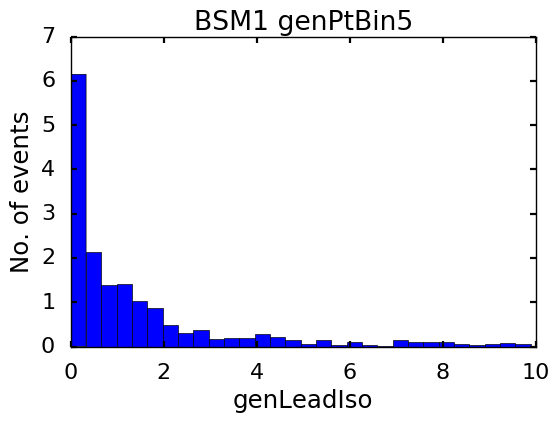

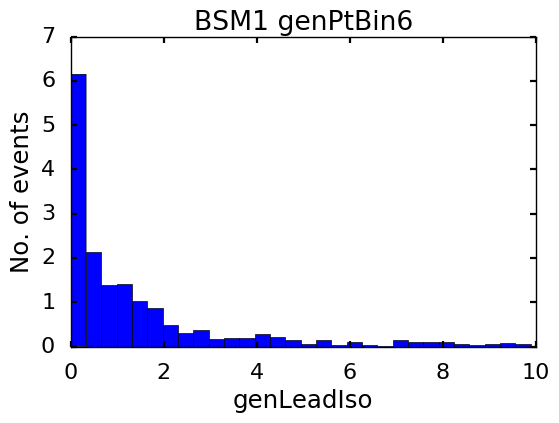

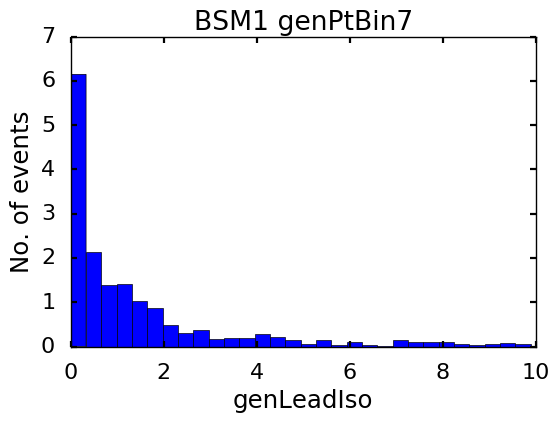

In [58]:
for genPtBIN in xrange(8) :
    plt.hist(genIso_BSM1['genLeadGenIso'],bins=30,weights=genIso_BSM1['weight'])
    plt.xlabel('genLeadIso')
    plt.ylabel('No. of events')
    plt.title('BSM1 genPtBin'+str(genPtBIN))
    plt.show()


#plt.hist(genSubIso_BSM1['genSubleadGenIso'],bins=50,
#         weights=genSubIso_BSM1['weight'])
#plt.show()


In [25]:
'reload(plotting)
for cl in class_list :
    for prod_mech in xrange(4,7,1) :
        
        plotting.draw_data_mc(df=df[df['proc']==prod_mech],
                               column = cl, 
                              logy=False, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(prod_mech),
                              absolute=False
                             )
        

SyntaxError: EOL while scanning string literal (<ipython-input-25-7a6e828a1efb>, line 1)

In [ ]:
len(FitterSM.df['class'])

In [ ]:
for s in list(set(df_SM.columns)-set(df_BSM1.columns)) :
    df_BSM1[s] = 0
    print s

In [ ]:
#df_BSM1[0:5].T

In [ ]:
df_BSM1[0:1]

In [ ]:
col = df_SM.columns

In [ ]:
print np.shape(df_BSM1)
print np.shape(df_SM)

In [ ]:
#df_all = pd.concat([df_SM,df_BSM1])
print col

In [ ]:
print df_BSM1['recoPtBin'][0:5]
print df_BSM1['recoPtCat'][0:5]


In [ ]:
print df_SM['recoPtBin'][0:5]
print df_SM['recoPtCat'][0:5]


In [ ]:
r1 = df_SM[0:2][[u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity',u'recoPtCat', u'class_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_prob_24']]
r2 = df_BSM1[0:1][[u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity',u'recoPtCat', u'class_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_prob_24']]

In [ ]:
r1

In [ ]:
r2

In [ ]:
r1 = r1.append(r2,ignore_index=True)

In [ ]:
r1

In [ ]:
FitterSM.df = FitterSM.df.append(df_BSM1)

In [ ]:
print np.shape(df_BSM1)

In [ ]:
defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
            #'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
              }
ut.runDefineBins(effFitter_BSM_1,defineBins)
df_BSM1 = effFitter_BSM_1.df
ut.runEvaluation(effFitter_BSM_1)

In [ ]:
print np.shape(df_BSM1)

In [ ]:
df_BSM1.columns